# Shelly-Ann Duncan
# 11/28/22
# Project 3 - IMDB - Part 2-EDA

# Import necessary libraries

In [8]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json, os, time, math
import tmdbsimple as tmdb
from tqdm.notebook import tqdm_notebook

In [2]:
# load data for year 2000
year_2000 = pd.read_csv('Data/ final_tmdb_data_2000.csv.gz')
year_2000.head(3)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN


In [3]:
# load data for year 2001
year_2001 = pd.read_csv('Data/ final_tmdb_data_2001.csv.gz')
year_2001.head(3)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.327,1159.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN


In [4]:
# concatenate year_2000 and year_2001 into one dataframe
new_data = pd.concat([year_2000, year_2001])
new_data.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.filmymen.us/2022/11/in-mood-for-lo...,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.104,2037.0,PG


In [5]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2485 entries, 0 to 1281
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2485 non-null   object 
 1   adult                  2483 non-null   float64
 2   backdrop_path          1305 non-null   object 
 3   belongs_to_collection  197 non-null    object 
 4   budget                 2483 non-null   float64
 5   genres                 2483 non-null   object 
 6   homepage               240 non-null    object 
 7   id                     2483 non-null   float64
 8   original_language      2483 non-null   object 
 9   original_title         2483 non-null   object 
 10  overview               2432 non-null   object 
 11  popularity             2483 non-null   float64
 12  poster_path            2202 non-null   object 
 13  production_companies   2483 non-null   object 
 14  production_countries   2483 non-null   object 
 15  rele

In [6]:
# how many movies had at least some valid financial information (values > 0 for budget OR revenue)?
df_filter = (new_data['budget'] > 0) | (new_data['revenue'] > 0)
df_filter.value_counts()

False    1860
True      625
dtype: int64

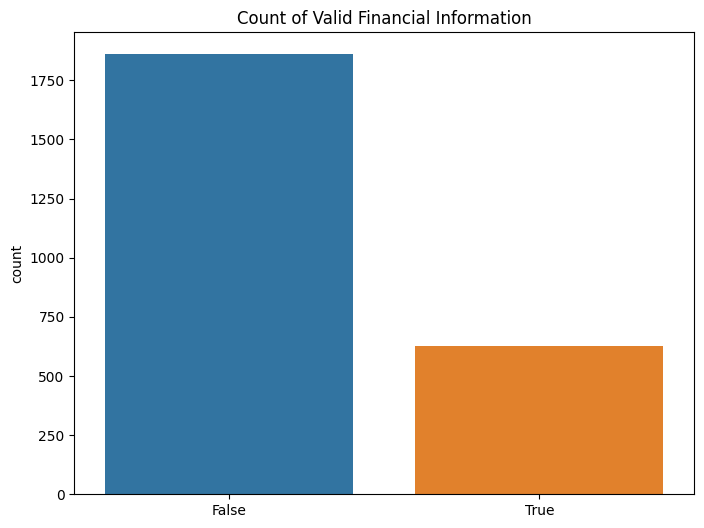

In [26]:
# plot
plt.figure(figsize = (8, 6))
sns.countplot(x = df_filter)
plt.title('Count of Valid Financial Information');

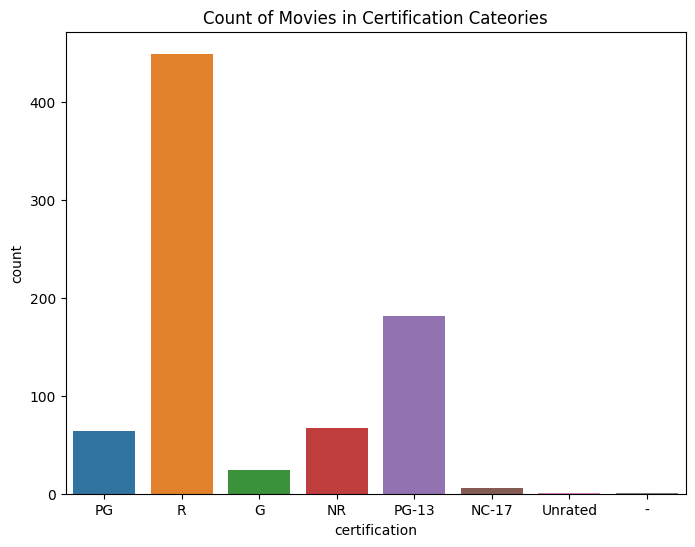

In [28]:
# how many movies are there in each of the certification categories (G/PG/PG-13/R)?
plt.figure(figsize = (8, 6))
sns.countplot(x = 'certification', data = new_data)
plt.title('Count of Movies in Certification Cateories');

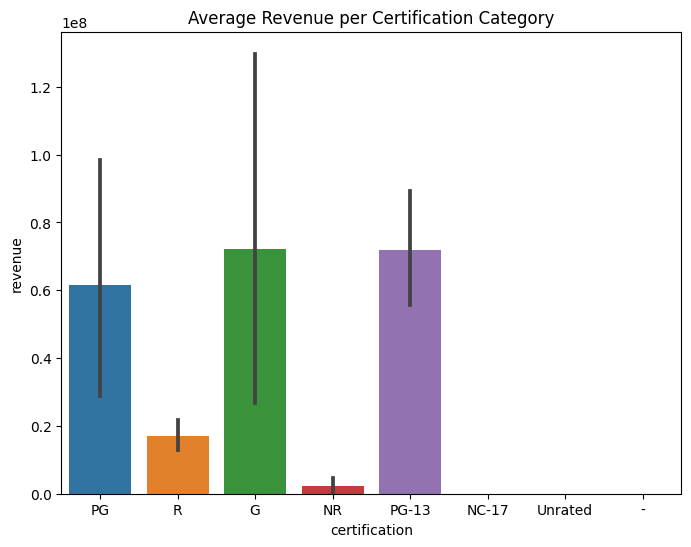

In [30]:
# what is the average revenue per certification category?
plt.figure(figsize = (8, 6))
sns.barplot(x = 'certification', y = 'revenue', data = new_data)
plt.title('Average Revenue per Certification Category');

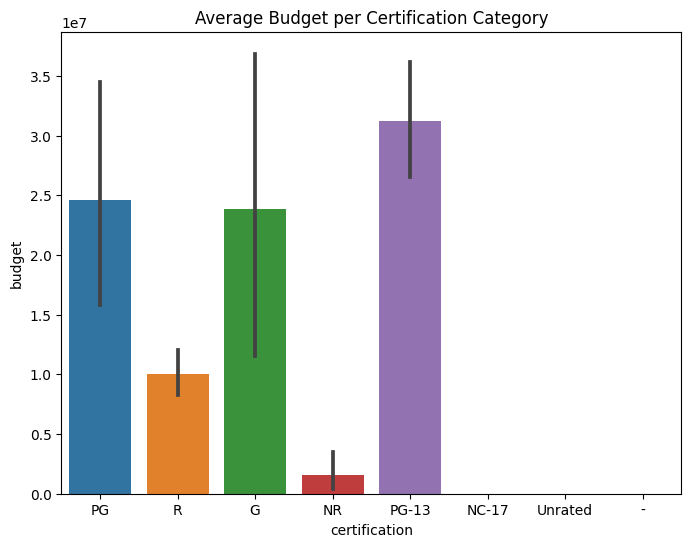

In [31]:
# what is the average budget per certification category?
plt.figure(figsize = (8, 6))
sns.barplot(x = 'certification', y = 'budget', data = new_data)
plt.title('Average Budget per Certification Category');

In [37]:
# save a final merged .csv.gz of all of the tmdb api data
# the file name should be "tmdb_results_combined.csv.gz"
new_data.to_csv("Data/tmdb_results_combined.csv.gz", compression = 'gzip', index = False)